In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:\code\Statistical-ML-models\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df_origin = df.copy(deep=True)
df.drop(['CustomerID','Gender'], axis=1, inplace = True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [7]:
df.columns = ['age','annual_income', 'spending_score']
df.head()

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


Text(0, 0.5, 'annual_income')

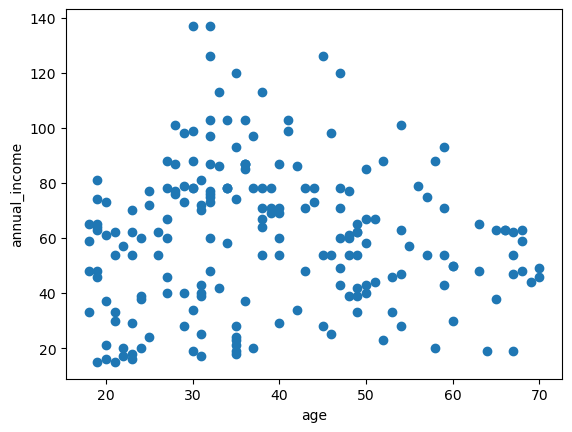

In [11]:
plt.scatter(df['age'], df['annual_income'])
plt.xlabel('age')
plt.ylabel('annual_income')

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_sc = sc.fit_transform(df)
dff_sc=pd.DataFrame(df_sc, columns = df.columns)
dff_sc

,age,annual_income,spending_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


Text(0, 0.5, 'spending_score')

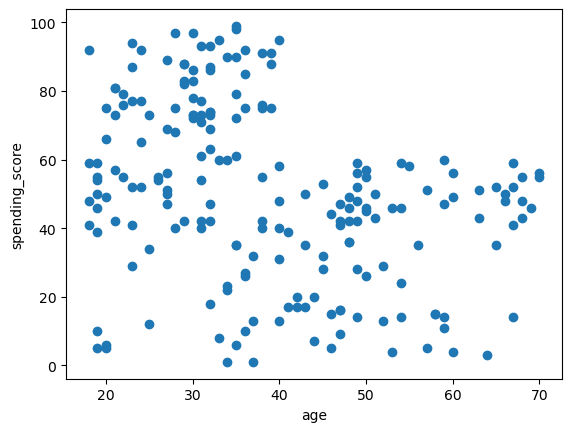

In [10]:
plt.scatter(df['age'], df['spending_score'])
plt.xlabel('age')
plt.ylabel('spending_score')

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
K = 11
sil = []
sil_map = {}
wcss = []

for i in range(2,K):
    m_km = KMeans(n_clusters = i, init = 'k-means++')
    m_km.fit(df_sc)
    
    pred = m_km.predict(df_sc)

    wcss.append(m_km.inertia_)
    s=silhouette_score(df_sc, pred)
    sil.append(s)
    sil_map[s] = i

[389.3861889564371, 295.99495819041357, 205.22514747675916, 168.24758017556837, 133.86833362685582, 117.17517978708028, 103.81797230310198, 93.04640986762908, 81.48774783378886]


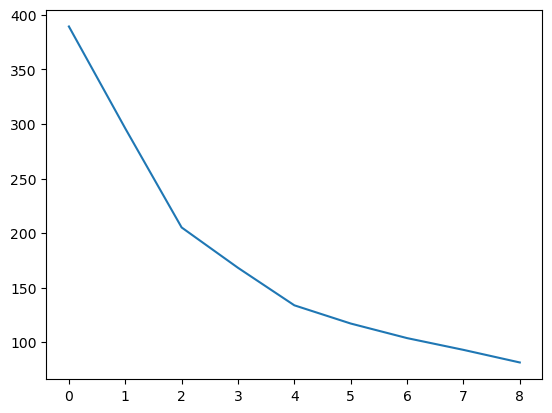

In [22]:
print(wcss)
plt.plot(wcss) #From the below identified elbow point, lets opt for creating 4 clusters

In [33]:
sil_map.get(max(sil)) #As per silhouette score number of proposed number of clusters is 6

6

In [40]:
km = KMeans(n_clusters = 4, init = 'k-means++')
km.fit(df_sc)
print(f"Cluster centroids: {km.cluster_centers_}")

pred = km.predict(df_sc)
silhouette_score(df_sc, pred)


Cluster centroids: [[-0.42880597  0.97484722  1.21608539]
 [ 0.03720536  0.99011499 -1.18875705]
 [-0.96249203 -0.78476346  0.39202966]
 [ 1.08616125 -0.49056525 -0.39717443]]


0.4039582785148566

In [41]:
km = KMeans(n_clusters = 6, init = 'k-means++')
km.fit(df_sc)
print(f"Cluster centroids: {km.cluster_centers_}")

pred = km.predict(df_sc)
silhouette_score(df_sc, pred)


Cluster centroids: [[ 0.22171558  1.08322527 -1.29005223]
 [ 0.47895722 -1.30822992 -1.19644353]
 [-0.44191719  0.99158305  1.23950275]
 [-0.87309844 -0.11378508 -0.09358039]
 [-0.97602698 -1.32549704  1.0371827 ]
 [ 1.25472096 -0.24021294 -0.04399777]]


0.42742814991580175

In [53]:
#Since no much difference between and 6 number of clusters we go with 6 as suggested silhouette score
km = KMeans(n_clusters = 6, init = 'k-means++')
km.fit(df_sc)
print(f"Cluster centroids: {km.cluster_centers_}")

pred = km.predict(df_sc)
silhouette_score(df_sc, pred)

df_origin['cluster_id'] = pred
df

Cluster centroids: [[ 1.25472096 -0.24021294 -0.04399777]
 [-0.44191719  0.99158305  1.23950275]
 [ 0.47895722 -1.30822992 -1.19644353]
 [-0.87309844 -0.11378508 -0.09358039]
 [ 0.22171558  1.08322527 -1.29005223]
 [-0.97602698 -1.32549704  1.0371827 ]]


,age,annual_income,spending_score,cluster_id
0,19,15,39,2
1,21,15,81,2
2,20,16,6,5
3,23,16,77,2
4,31,17,40,5
...,...,...,...,...
195,35,120,79,3
196,45,126,28,4
197,32,126,74,3
198,32,137,18,4


In [62]:
# df_origin.columns = dff_sc.columns
df_g=df_origin.iloc[:, [2,3,4]]
df_g


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


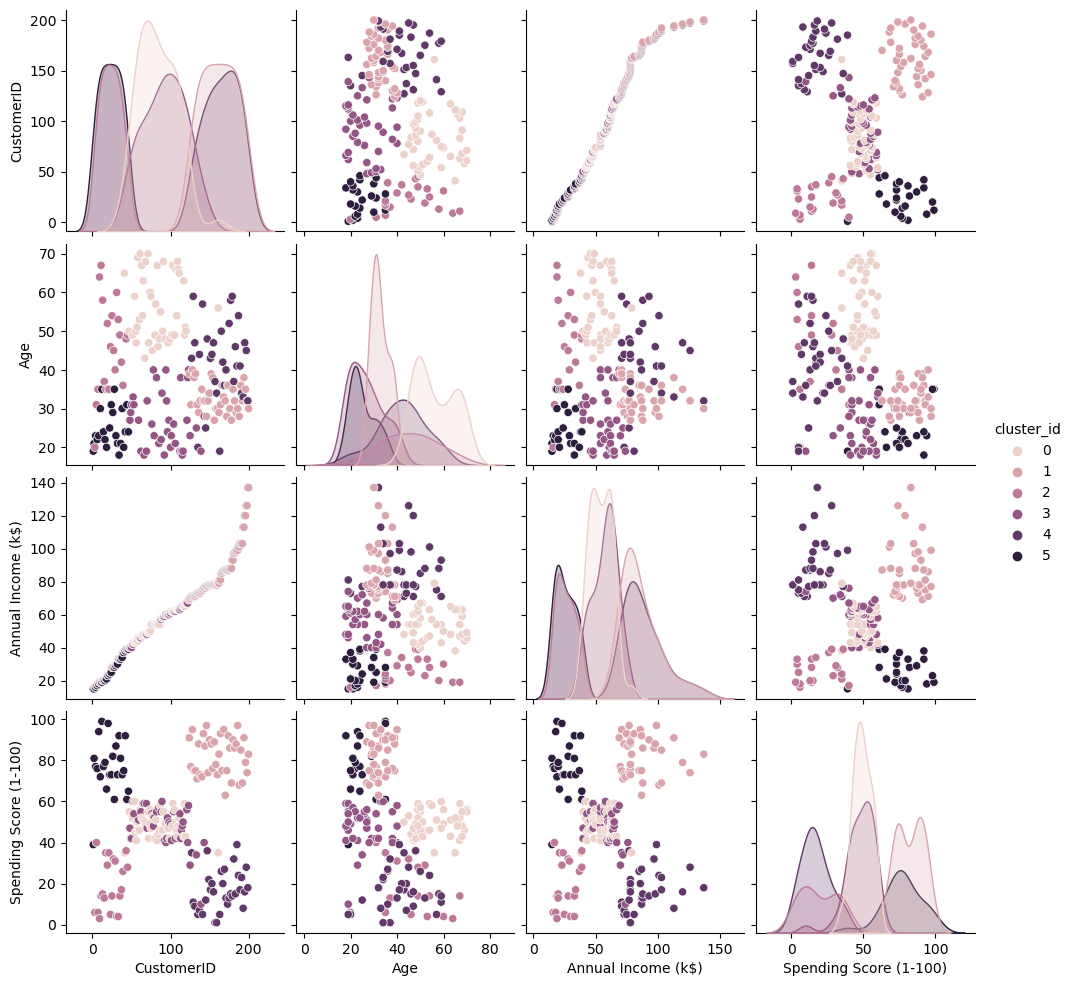

In [64]:
sns.pairplot(df_origin, hue = 'cluster_id')

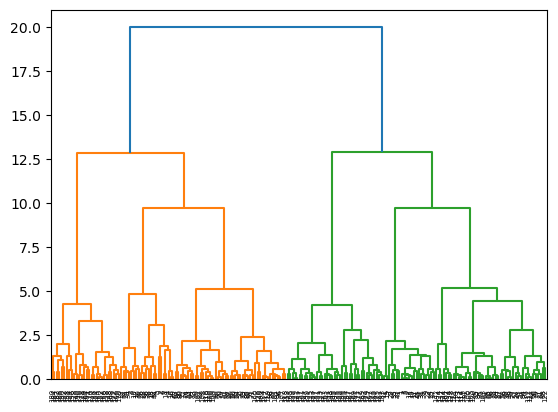

In [67]:
# HIERARCHICAL CLUSTERING (AGGLOMERATIVE)
import scipy.cluster.hierarchy as sch
denro = sch.dendrogram(sch.linkage(df_sc, method='ward'))
plt.show()
# import scipy.cluster.hierarchy as sch
# dendro=sch.dendrogram(sch.linkage(df_tmp, method='ward'))
# plt.show()

#No of clusters suggested by dendrogram is 4 as we have 4 vertical longest lines without any horizontan cuts


In [73]:
from sklearn.cluster import AgglomerativeClustering

m_agg = AgglomerativeClustering(n_clusters=4)
pred = m_agg.fit_predict(df_sc)

# df_agg = df.iloc[:,:-1].copy(deep=True)
df_origin['agg_cluster_id'] = pred
df_origin.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_id,agg_cluster_id
0,1,Male,19,15,39,5,0
1,2,Male,21,15,81,5,1
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,5,1
4,5,Female,31,17,40,2,0


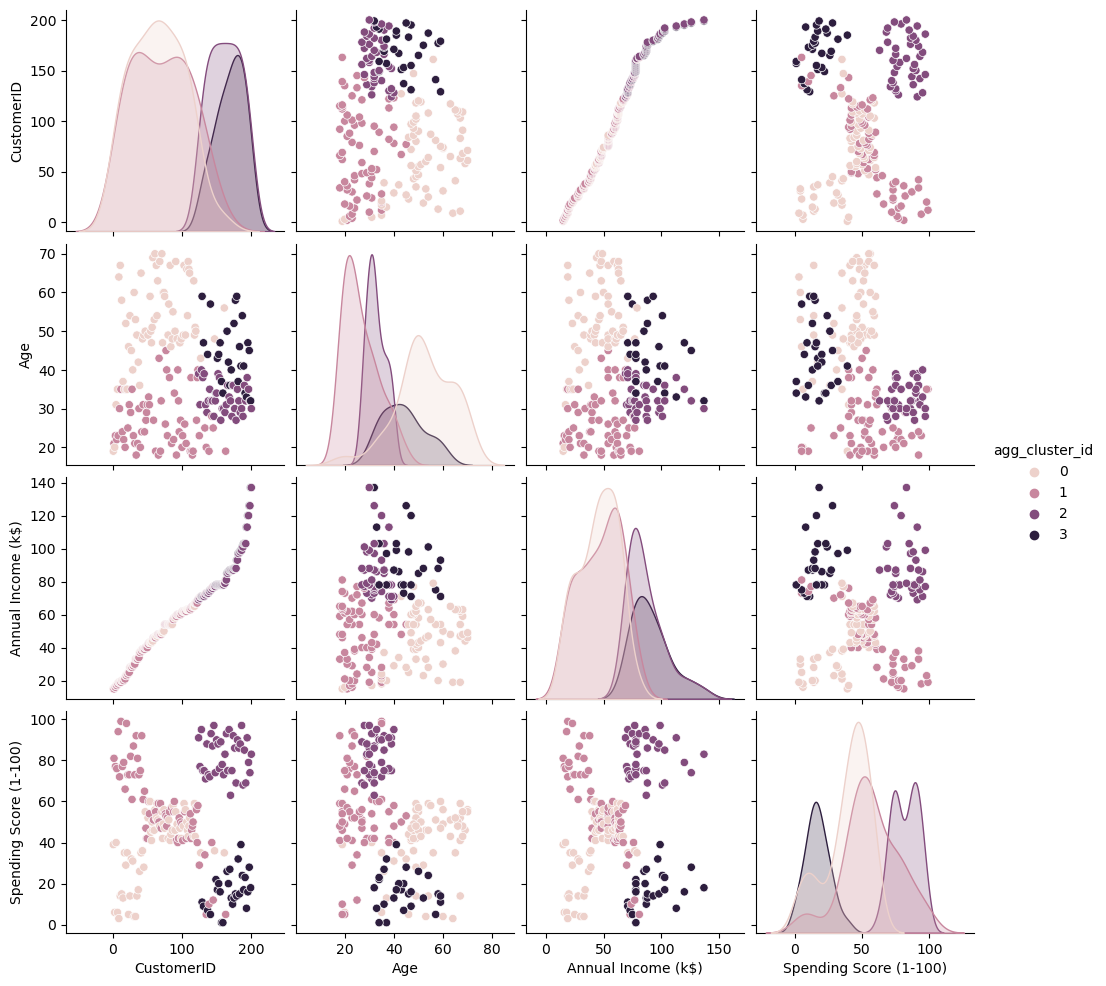

In [75]:
sns.pairplot(df_origin.drop('cluster_id', axis = 1), hue='agg_cluster_id')

In [77]:
#DBSCAN
from sklearn.cluster import DBSCAN

In [140]:
# choose the optimal number of parameters for epsilon and min_pts
#For epsilon, lets first compute the chart for distances using nearestneighbors
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=1).fit(df_sc)

distances ,indices= nn.kneighbors(df.iloc[:,:-1])
# distances ,indices= nn.kneighbors(df_sc)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but NearestNeighbors was fitted without feature names



In [141]:
# df.iloc[:,:-1]
df_sc

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

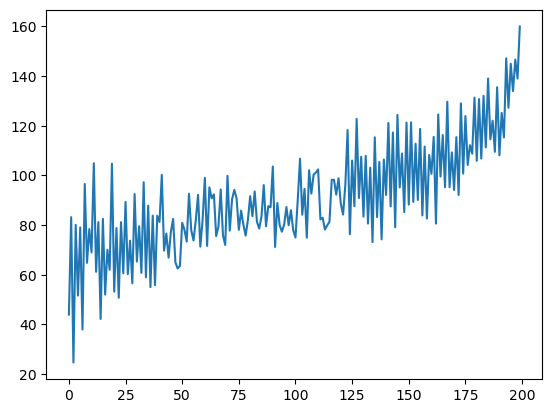

In [142]:
dist=distances.reshape(-1,)
plt.plot(dist)

In [157]:
#Lets choose epsilon of 0.16 based on the observation
#Lets min samples -6 as number of dimensions we consider here is 3. if dim>2, min_pts suggeseted is 2*dim

m_db = DBSCAN(eps = 0.5, min_samples=6)
m_db.fit(df_sc)

m_db.labels_

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0,  1, -1, -1,  0, -1,  0, -1,  0,
       -1,  0, -1, -1, -1,  0, -1,  0,  1,  2,  1, -1,  1,  2,  2,  2,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  2,  1,  1,
        2,  2,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  2,
        1,  1,  2, -1,  1,  1,  2,  1,  1,  2,  2,  1,  2,  1,  2,  2,  1,
        1,  2,  1,  2,  1,  1,  1,  1,  1,  2,  1,  2,  2,  2,  1,  1,  1,
        1,  2, -1, -1,  3, -1,  3, -1,  3, -1,  3,  4,  3,  2,  3, -1,  3,
        4,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3,  4,  3,  4,
        3,  4,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3,  4,  3, -1, -1,
        4,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,
       -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [158]:
dbs_pred = m_db.fit_predict(df_sc)
df['dbs_clusterid'] = dbs_pred
df

,age,annual_income,spending_score,cluster_id,dbs_clusterid
0,19,15,39,2,-1
1,21,15,81,2,0
2,20,16,6,5,-1
3,23,16,77,2,0
4,31,17,40,5,-1
...,...,...,...,...,...
195,35,120,79,3,-1
196,45,126,28,4,-1
197,32,126,74,3,-1
198,32,137,18,4,-1


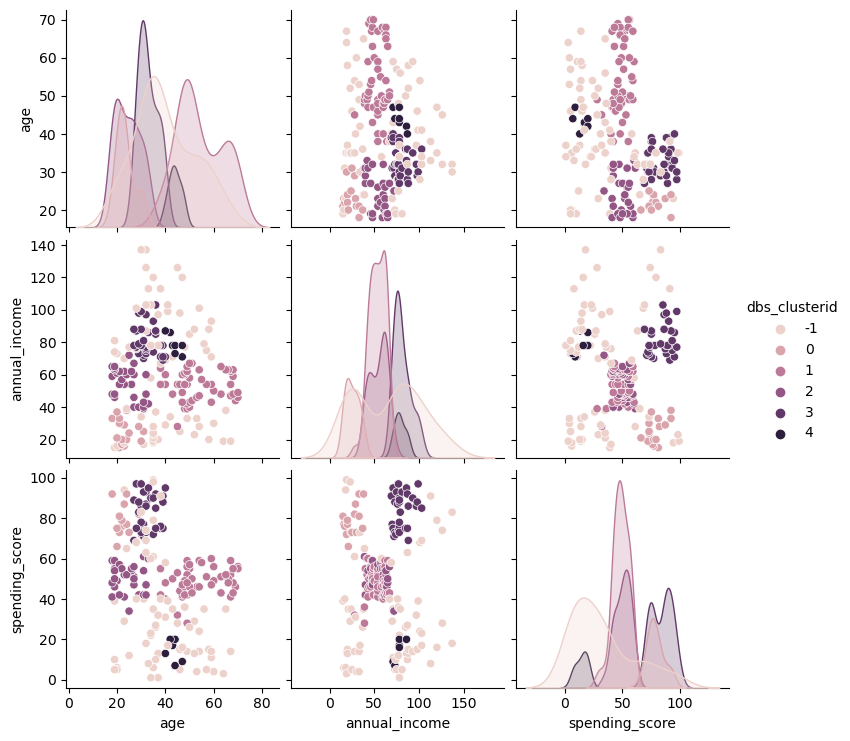

In [159]:
sns.pairplot(df.drop('cluster_id', axis = 1), hue='dbs_clusterid')